In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
data_names = ["enb", "edm", "slump", "scm1d"]
data_files = [ "summary_" + data + ".pickle" for data in data_names] 

In [3]:
# Function to make certain plots
def MyPlot(summary, par, data):
    for mod in summary.keys():
        x = summary[mod][par]
        plt.plot(range(1, len(x) + 1), x, marker = "o")
    
    p = len(summary["PC_cat"]["MSE"])
    plt.xticks(
        range(1, p + 1), 
        fontsize = 15, 
        fontweight = "bold"
    ) 
    plt.yticks(
        fontsize = 15, 
        fontweight = "bold"
    )
    plt.xlabel(
        "Target column of " + data, 
        fontsize = 15, 
        fontweight = "bold"
    )
    plt.ylabel(
        par, 
        fontsize = 15, 
        fontweight = "bold"
    )
    plt.title(
        par + " for each target column of " + data, 
        fontsize = 15, 
        fontweight = "bold"
    ) 
    plt.legend(
        summary.keys(), 
        prop = {
            "size" : 9,
            "weight" : "bold"
        }, 
    )

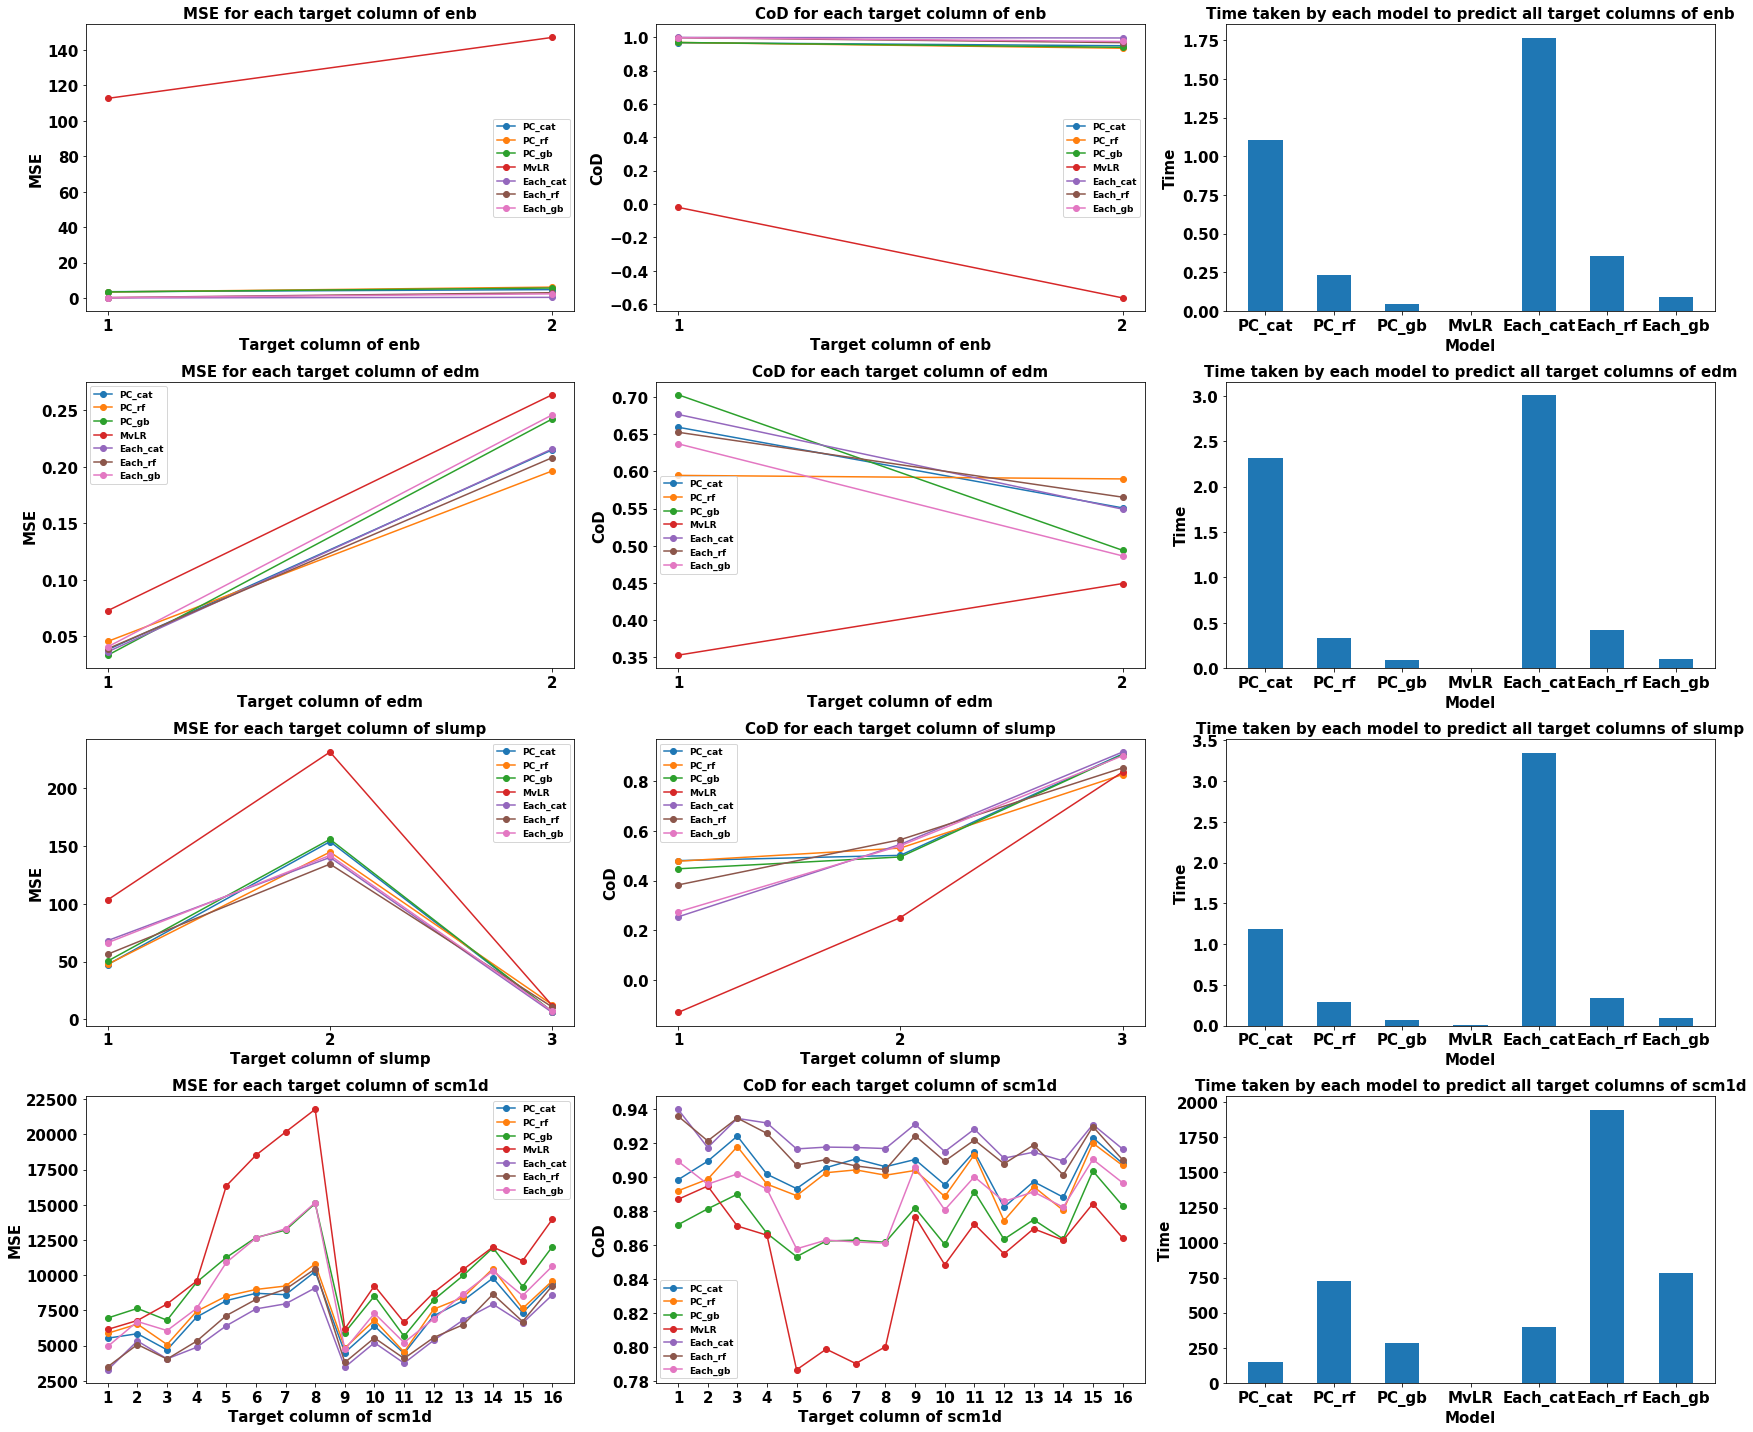

In [4]:
rcParams["figure.figsize"] = 25, 20   

n_p_t = []
eig_val = []

# Plot for all 4 datasets
for i, data in enumerate(data_names):
    summary = pickle.load(open(data_files[i], "rb"))
    
    # 1. Plot MSE
    plt.subplot(4, 3, 3*i + 1)
    MyPlot(
        summary, 
        "MSE", 
        data
    )
    
    # Plot CoD
    plt.subplot(4, 3, 3*i + 2)
    MyPlot(
        summary, 
        "CoD", 
        data
    )
    
    # Plot Time taken
    plt.subplot(4, 3, 3*i + 3)
    plt.bar(
        summary.keys(), 
        [item["Time"] for item in summary.values()], 
        width = 0.5
    )
    plt.xticks(
        fontsize = 15, 
        fontweight = "bold"
    ) 
    plt.yticks(
        fontsize = 15, 
        fontweight = "bold"
    )
    plt.xlabel(
        "Model", 
        fontsize = 15, 
        fontweight = "bold"
    )
    plt.ylabel(
        "Time", 
        fontsize = 15, 
        fontweight = "bold"
    )
    plt.title(
        "Time taken by each model to predict all target columns of " + data,
        fontsize = 15, 
        fontweight = "bold"
    ) 
    
    n = summary["PC_cat"]["n"] + 1
    p = len(summary["PC_cat"]["MSE"])
    t = sum(summary["PC_cat"]["eig_val"][: n])
    n_p_t.append((n, p, t))
    
    eig_val.append(summary["PC_cat"]["eig_val"])
    
plt.tight_layout()

In [5]:
rcParams["figure.figsize"] = 5, 5

# Function to plot barplots
def MyBarPlot(xlist, ylist, xlab, ylab):
    plt.bar(
        xlist,
        [100]*len(xlist),
        width = 0.5,
        color = "gold"
    )
    plt.bar(
        xlist, 
        ylist, 
        width = 0.5, 
        color = "skyblue"
    )
    plt.xticks(
        fontsize = 15, 
        fontweight = "bold"
    ) 
    plt.yticks(
        fontsize = 15, 
        fontweight = "bold"
    )
    plt.xlabel(
        xlab, 
        fontsize = 15, 
        fontweight = "bold"
    )
    plt.ylabel(
        ylab, 
        fontsize = 15, 
        fontweight = "bold"
    )

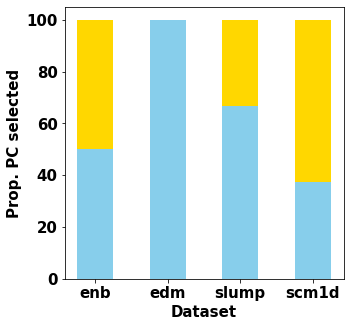

In [6]:
# Plotting barplot for proportion of principal components selected
MyBarPlot(
    data_names,
    [(n/p)*100 for n,p,t in n_p_t], 
    "Dataset",
    "Prop. PC selected"
)

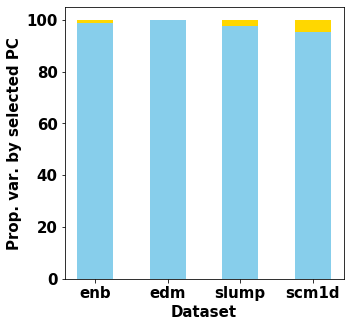

In [7]:
# Plotting barplot for proportion of variance by selected principal components
MyBarPlot(
    data_names,
    [t for n,p,t in n_p_t], 
    "Dataset",
    "Prop. var. by selected PC"
)

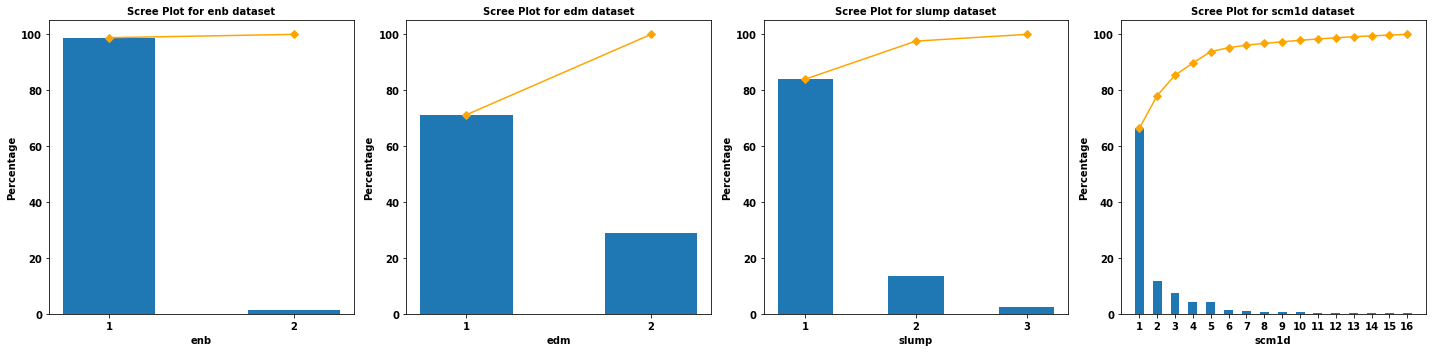

In [8]:
rcParams["figure.figsize"] = 20, 5

# Plotting screeplots (pareto charts)
for i, e in enumerate(eig_val):
    plt.subplot(1, 4, i + 1)
    
    ylist_bar = e
    ylist_line = np.cumsum(ylist_bar).tolist()
    xlist = range(1, len(ylist_bar) + 1)
    xlist = [str(x) for x in xlist]
    
    plt.bar(
        xlist,
        ylist_bar,
        width = 0.5
    )
    plt.plot(
        xlist, 
        ylist_line, 
        color = "orange", 
        marker = "D"
    )
    plt.xticks(
        fontsize = 10, 
        fontweight = "bold"
    ) 
    plt.yticks(
        fontsize = 10, 
        fontweight = "bold"
    )
    plt.xlabel(
        data_names[i], 
        fontsize = 10, 
        fontweight = "bold"
    )
    plt.ylabel(
        "Percentage", 
        fontsize = 10, 
        fontweight = "bold"
    )
    plt.title(
        "Scree Plot for " + data_names[i] + " dataset",
        fontsize = 10, 
        fontweight = "bold"
    ) 

plt.tight_layout()